# Title: Testing New Dataset of Dibates on already train model on pima Dataset
#### Group Member Names : Bikas Chaudhary, Gunjan Chimariya



### INTRODUCTION:
Diabetes Prediction using machine learning and explainable AI techniques
#### AIM :

The study aims to develop a system for automatically predicting diabetes using machine learning and explainable AI methods. It utilizes new datasets, including one specifically from female patients in Bangladesh, in addition to the widely used Pima Indian dataset.

*********************************************************************************************************************

#### Github Repo:


*********************************************************************************************************************
#### DESCRIPTION OF PAPER: 

This research introduces an innovative system for predicting diabetes that leverages a variety of machine learning techniques. It incorporates a novel dataset from Bangladeshi female patients, assessing various algorithms such as decision trees, SVM, Random Forest, Logistic Regression, KNN and ensemble methods to determine the most effective features for diabetes prediction.


*********************************************************************************************************************
#### PROBLEM STATEMENT :

The research addresses the need for early and precise diabetes detection, a criticl factor in preventing the severe complications associated with the disease. Despite diabetes being a leading cause of morbidity worldwide, existing diagnosti methods are often inadequate for early detection.

*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:

Diabetes affects millions globally and can lead to serious health issues if not diagnosed early. The current diagnostic tools and methods fall short in predicting diabetes at an early stage, necessitating more effective solutions. 

*********************************************************************************************************************
#### SOLUTION:

The proposed solution is a diabetes prediction system tailored for a private dataset of female patients from Bangladesh, though it also utilizes the Pima Indian dataset for broader applicability. The study highlights the superior performance of the XGBoost cclassifier enhanced with the ADASYN technique , achieving an accuracy of 81% , an F1 score of 0.81, and an AUC of 0.84. To add transparency to the model predictions, explainable AI techniques using the LIME and SHAP frameworks are emploues. The paper culminates in the deployment of this system in to a web interface and an Android app, enabling real-time , user firendly diabetes prediction. 






# Background

## Research Context
Diabetes mellitus is a significant global health issue that affects millions worldwide. It's a chronic disease that can lead to severe complications like heart disease, kidney failure, and nerve damage, among others. Early and accurate diagnosis is crucial to manage and potentially mitigate these severe health outcomes.

## Current Challenges
Traditional methods for diabetes diagnosis can be insufficient for early detection. Moreover, many existing automated prediction systems rely on datasets that may not be representative of all demographics or are limited in scope and diversity.

## Study Objective
The paper aims to develop an automatic diabetes prediction system that utilizes machine learning techniques to improve the accuracy and timeliness of diabetes detection. This includes the use of a novel dataset from Bangladesh, aiming to diversify the populations and conditions under which the prediction models are tested.

## Methodology Overview
The study employs various machine learning algorithms such as decision trees, SVM, Random Forest, Logistic Regression, KNN, and ensemble methods, alongside explainable AI techniques (using LIME and SHAP) to increase the transparency and understandability of the model's predictions.

## Datasets Used
- **Pima Indian Dataset:** An open-source dataset commonly used in diabetes prediction studies, consisting of medical diagnostic measurements from a specific female population.
- **RTML Dataset:** A private dataset comprising health data collected from female employees at a textile mill in Bangladesh. This dataset includes measurements like glucose levels, BMI, and age but lacks an insulin feature, which is noted as a limitation.

## Innovations and Contributions
The study introduces a semi-supervised approach to predict missing insulin levels and uses advanced data processing techniques such as SMOTE and ADASYN to address class imbalance. The system's deployment in a web and Android application context allows for real-time diabetes prediction.

## Limitations Noted in the Study
The primary limitation is the nonavailability of the insulin feature in the RTML dataset, potentially impacting the prediction accuracy. The study's scope might also be limited by the demographic and geographical focus of the RTML dataset, affecting the generalizability of the findings.



| Reference                                                                                                          | Explanation                                                                                                                                                                                                                                                                  | Dataset/Input                                                                                                                                                                             | Weakness                                                                                                                                                                                                                                                                                                                                                       |
|--------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Tasin et al., Diabetes Prediction Using Machine Learning and Explainable AI Techniques                             | The paper proposes an automatic diabetes prediction system using machine learning techniques and explainable AI to increase early detection accuracy. The system integrates various classification algorithms to identify the most effective ones and employs explainable AI tools to make the model's decisions transparent to users. | The study utilized two primary datasets: the widely used Pima Indian dataset and a new, private dataset consisting of physical examination data from female patients at a textile mill in Bangladesh, referred to as the RTML dataset. | While the study introduces a novel approach to diabetes prediction and the use of a private dataset, it acknowledges limitations such as the nonavailability of insulin features in the RTML dataset. Moreover, the prediction accuracy and the models' robustness might be affected by the size and demographic limitations of the private dataset. |


*********************************************************************************************************************






# Implement paper code :





In [109]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold,cross_val_score

from sklearn.ensemble import BaggingClassifier


Dataset 1- Pima Indian dataset

In [110]:
Pima_dataset = pd.read_csv('RTML with Insulin.csv')

In [111]:
Pima_dataset.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome,Insulin
0,0,5,88.2,106.0,4.8,14.794213,50,0,169.93932
1,1,6,73.8,74.0,7.5,24.851410,50,0,156.35982
2,2,1,86.4,87.0,18.4,41.621307,30,0,93.89245
3,3,1,97.2,71.0,15.0,22.608427,28,0,109.82179
4,4,5,90.0,96.0,7.6,19.154528,50,0,111.14350
5,5,0,70.2,83.0,6.7,23.051801,18,0,139.25388
6,6,3,84.6,74.0,4.2,14.130982,40,0,163.27500
7,7,3,95.4,84.0,15.0,39.700324,30,0,100.88469
8,8,0,88.2,74.0,4.5,16.567359,18,0,139.36551
9,9,0,79.2,67.0,12.5,21.518855,18,0,82.25378


In [112]:
Pima_dataset=Pima_dataset.drop(['Unnamed: 0'],axis=1)

Before Dropping the Null values

In [113]:
Pima_dataset.shape

(109, 8)

In [114]:
Pima_dataset.shape

(109, 8)

Find  the details of all the **Attributes**

In [115]:
Pima_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome,Insulin
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,1.412844,106.794495,79.411927,10.782569,24.391334,30.825688,0.211009,127.961971
std,1.963609,40.302894,13.199016,4.681798,7.456557,16.204048,0.409910,49.227642
min,0.000000,52.200000,5.900000,2.900000,2.612584,18.000000,0.000000,35.748672
25%,0.000000,81.000000,71.000000,7.300000,18.513926,18.000000,0.000000,84.167880
50%,1.000000,90.000000,81.000000,9.900000,23.576979,23.000000,0.000000,133.103780
75%,2.000000,109.800000,86.000000,14.000000,28.554780,44.000000,0.000000,160.223020
max,8.000000,239.400000,115.000000,23.300000,41.621307,77.000000,1.000000,286.253630


In [116]:
Pima_dataset.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
BMI              0
Age              0
Outcome          0
Insulin          0
dtype: int64

In [117]:
print("number of rows with glucose value 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BMI'] == 0])))
# print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Age'] == 0])))


number of rows with glucose value 0 is: 0
number of rows with missing BloodPressure 0 is: 0
number of rows with missing skin thikness 0 is: 0
number of rows with Insulin 0 is: 0
number of rows with BMI 0 is: 0
number of rows with age 0 is: 0


In [118]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=0)
imputer = imputer.fit(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])


In [119]:
print("number of rows with glucose value 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BMI'] == 0])))

# print("number of rows with  0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Age'] == 0])))


number of rows with glucose value 0 is: 0
number of rows with missing BloodPressure 0 is: 0
number of rows with missing skin thikness 0 is: 0
number of rows with Insulin 0 is: 0
number of rows with BMI 0 is: 0
number of rows with age 0 is: 0


In [120]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome,Insulin
0,5,88.2,106.0,4.8,14.794213,50,0,169.93932
1,6,73.8,74.0,7.5,24.851410,50,0,156.35982
2,1,86.4,87.0,18.4,41.621307,30,0,93.89245
3,1,97.2,71.0,15.0,22.608427,28,0,109.82179
4,5,90.0,96.0,7.6,19.154528,50,0,111.14350
5,0,70.2,83.0,6.7,23.051801,18,0,139.25388
6,3,84.6,74.0,4.2,14.130982,40,0,163.27500
7,3,95.4,84.0,15.0,39.700324,30,0,100.88469
8,0,88.2,74.0,4.5,16.567359,18,0,139.36551
9,0,79.2,67.0,12.5,21.518855,18,0,82.25378


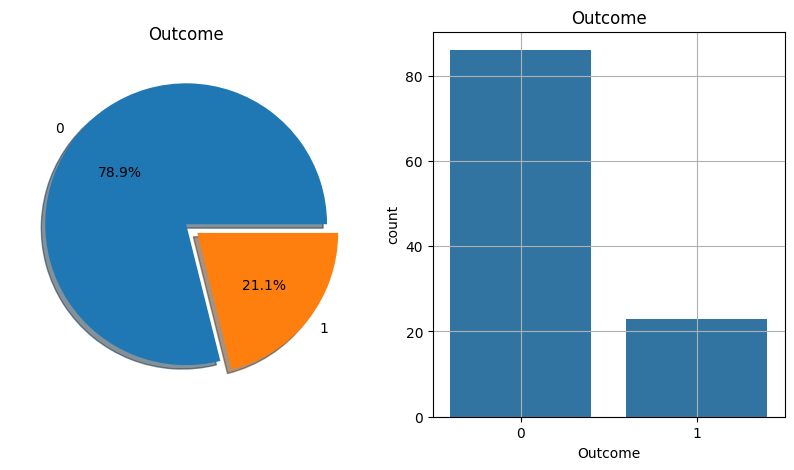

In [296]:
# outcome
f, ax = plt.subplots(1, 2, figsize=(10, 5))
Pima_dataset['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=Pima_dataset, ax=ax[1])  # Removed the 'ax' parameter
ax[1].set_title('Outcome')
N,P = Pima_dataset['Outcome'].value_counts()

plt.grid()
plt.show()

In [122]:
Pima_dataset['Outcome'].value_counts()

Outcome
0    86
1    23
Name: count, dtype: int64

# **Split the Data (Train Test Split)**

In [123]:
X = Pima_dataset.drop(columns='Outcome', axis=1)
Y = Pima_dataset['Outcome']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [125]:
# URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
# Estimate mutual information for a discrete target variable.
# Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. 
# It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 0)
mutual_info


array([0.10783214, 0.41558699, 0.07909108, 0.        , 0.20230324,
       0.24439851, 0.15148842])

In [126]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Glucose          0.415587
Age              0.244399
BMI              0.202303
Insulin          0.151488
Pregnancies      0.107832
BloodPressure    0.079091
SkinThickness    0.000000
dtype: float64

<Axes: >

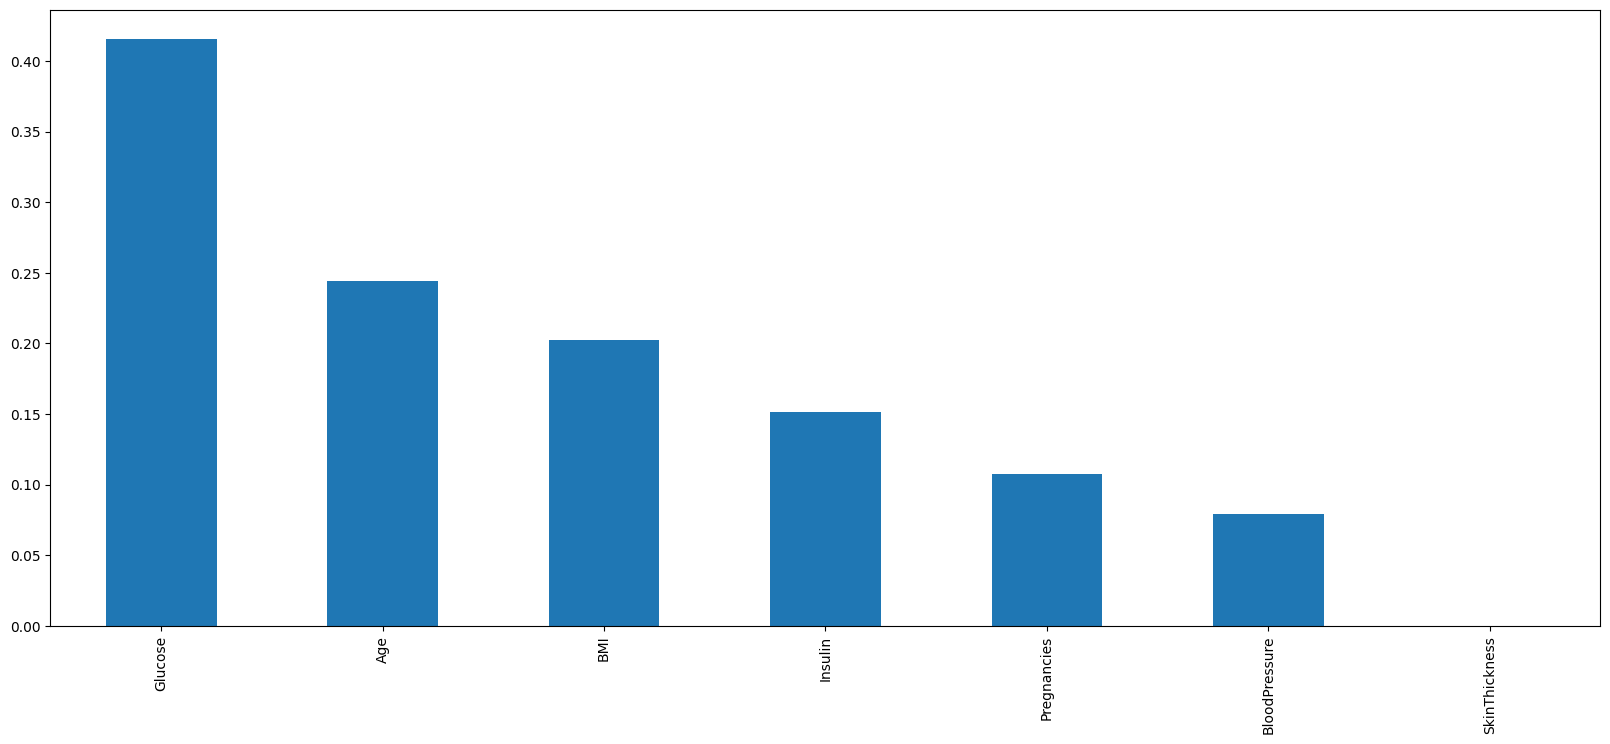

In [127]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar()

In [128]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome,Insulin
0,5,88.2,106.0,4.8,14.794213,50,0,169.93932
1,6,73.8,74.0,7.5,24.851410,50,0,156.35982
2,1,86.4,87.0,18.4,41.621307,30,0,93.89245
3,1,97.2,71.0,15.0,22.608427,28,0,109.82179
4,5,90.0,96.0,7.6,19.154528,50,0,111.14350
5,0,70.2,83.0,6.7,23.051801,18,0,139.25388
6,3,84.6,74.0,4.2,14.130982,40,0,163.27500
7,3,95.4,84.0,15.0,39.700324,30,0,100.88469
8,0,88.2,74.0,4.5,16.567359,18,0,139.36551
9,0,79.2,67.0,12.5,21.518855,18,0,82.25378


In [129]:
X = Pima_dataset.drop(columns='Outcome', axis=1)
Y = Pima_dataset['Outcome']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0, stratify =Y )

In [131]:
print(X.shape, X_train.shape,y_train.shape, X_test.shape)

(109, 7) (87, 7) (87,) (22, 7)


# **ADSYN Implementation**

In [132]:
from imblearn.over_sampling import ADASYN
from collections import Counter

counter  = Counter(y_train)
print('Before',counter)
ada = ADASYN(random_state=0,sampling_strategy='minority')

X_smote, y_smote = ada.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print('After',counter)


Before Counter({0: 69, 1: 18})
After Counter({1: 70, 0: 69})


In [133]:

# Befor smote
y_train.value_counts()

Outcome
0    69
1    18
Name: count, dtype: int64

In [134]:

# after smote

y_smote.value_counts()

Outcome
1    70
0    69
Name: count, dtype: int64

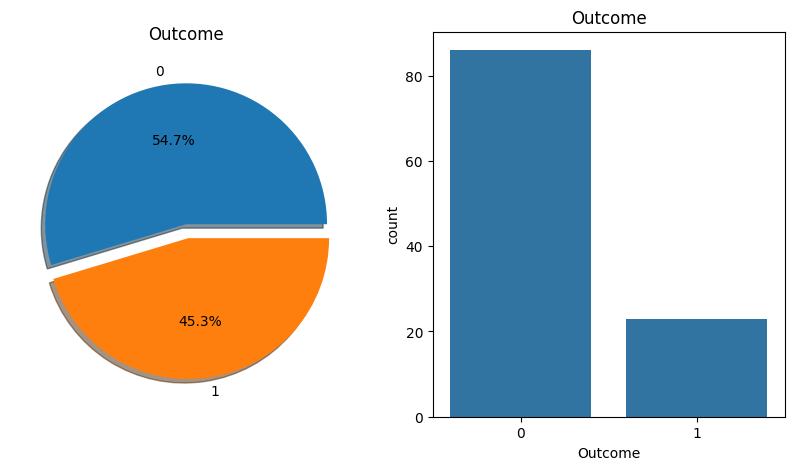

In [294]:
# outcome before smote
f,ax = plt.subplots(1,2, figsize=(10,5))
y_train.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

sns.countplot(x='Outcome', data=Pima_dataset, ax=ax[1])  # Removed the 'ax' parameter
ax[1].set_title('Outcome')
N,P = Pima_dataset['Outcome'].value_counts()



plt.show()

**# After smote**

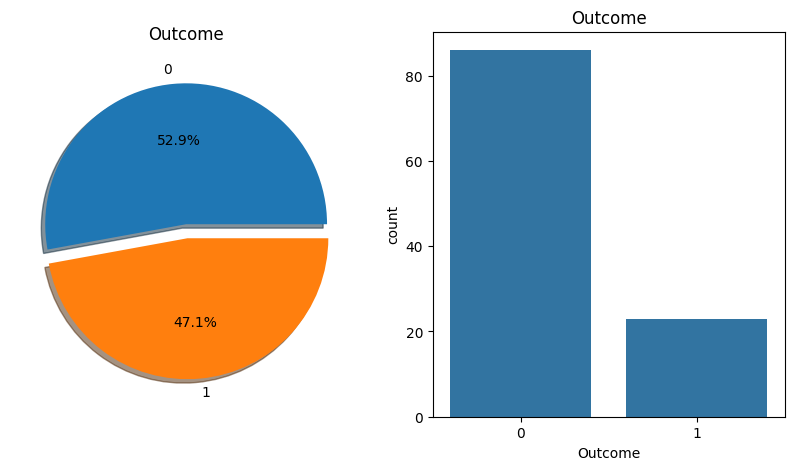

In [295]:
# outcome
f,ax = plt.subplots(1,2, figsize=(10,5))
y_smote.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

sns.countplot(x='Outcome', data=Pima_dataset, ax=ax[1])  # Removed the 'ax' parameter
ax[1].set_title('Outcome')
N,P = Pima_dataset['Outcome'].value_counts()


plt.show()

In [137]:

# Befor smote
y_train.value_counts()

Outcome
0    69
1    18
Name: count, dtype: int64

In [138]:
# after smote

y_smote.value_counts()

Outcome
1    70
0    69
Name: count, dtype: int64

#  **Grid search on svm (PERFECTLY DONE)**



In [139]:
# We need to scale correctly (We will use MinMax Scaler to do this)
cols_to_scale = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age']
scaler = MinMaxScaler()
scaler.fit(X_smote[cols_to_scale])
X_smote[cols_to_scale] = scaler.transform(X_smote[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [140]:
svm_clf = svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
# fitting the model for grid search
svm_grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [141]:
svm_grid.best_estimator_
svm_bestgrid=svm_grid.best_estimator_
svm_bestgrid

SVC(C=100, gamma=1)

In [142]:
y_pred=svm_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[17  0]
 [ 2  3]]
Accuracy Score 0.9090909090909091
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.60      0.75         5

    accuracy                           0.91        22
   macro avg       0.95      0.80      0.85        22
weighted avg       0.92      0.91      0.90        22



**K-fold cross validation(SVM)**

In [143]:

skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(svm_grid,X,Y,cv=skfold)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [144]:
cv_score

array([0.90909091, 0.95454545, 1.        , 1.        , 0.95238095])

In [145]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.9632034632034632 +/- 0.03414154831710885


# **Bagging Decision tree(PERFECTLY DONE)**


In [146]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=5,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
bagging.fit(X_smote,y_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=5, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [147]:
y_pred=bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[17  0]
 [ 1  4]]
Accuracy Score 0.9545454545454546
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.80      0.89         5

    accuracy                           0.95        22
   macro avg       0.97      0.90      0.93        22
weighted avg       0.96      0.95      0.95        22



**K-fold cross validation (Bagging)**

In [148]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(bagging,X,Y,cv=skfold)

In [149]:
cv_score

array([0.86363636, 0.95454545, 0.90909091, 0.95454545, 0.85714286])

In [150]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.9077922077922078 +/- 0.04216281319674789


# **Decision Tree(Perfectly Done)**

Depth =  2 , Training Accuracy =  0.9640287769784173 , Test Accuracy =  0.9090909090909091 , Diff =  5.493786788750821  %
Depth =  3 , Training Accuracy =  0.9856115107913669 , Test Accuracy =  0.9090909090909091 , Diff =  7.652060170045782  %
Depth =  4 , Training Accuracy =  0.9928057553956835 , Test Accuracy =  0.9090909090909091 , Diff =  8.371484630477443  %
Depth =  5 , Training Accuracy =  1.0 , Test Accuracy =  0.9090909090909091 , Diff =  9.090909090909093  %
Depth =  6 , Training Accuracy =  1.0 , Test Accuracy =  0.9090909090909091 , Diff =  9.090909090909093  %
Depth =  7 , Training Accuracy =  1.0 , Test Accuracy =  0.9090909090909091 , Diff =  9.090909090909093  %
Depth =  8 , Training Accuracy =  1.0 , Test Accuracy =  0.9090909090909091 , Diff =  9.090909090909093  %
Depth =  9 , Training Accuracy =  1.0 , Test Accuracy =  0.9090909090909091 , Diff =  9.090909090909093  %
Depth =  10 , Training Accuracy =  1.0 , Test Accuracy =  0.8636363636363636 , Diff =  13.636363636

Text(0, 0.5, 'Accuracy')

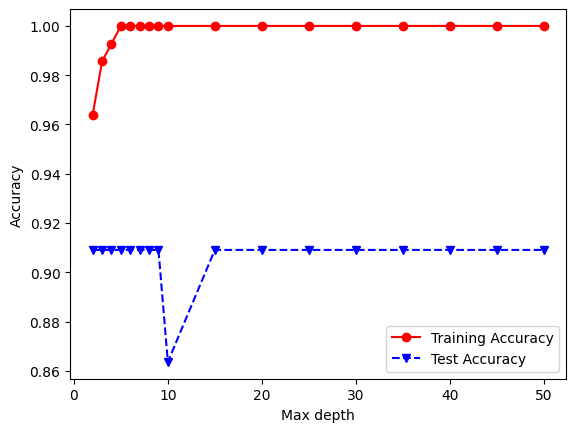

In [151]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_smote, y_smote)
    y_predTrain = clf.predict(X_smote)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_smote, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [152]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 2, random_state=0)
dt.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [153]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_smote, y_smote))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))
X_test_prediction  = dt.predict(X_test) 

print(classification_report(y_test, X_test_prediction))

Training Accuracy is:  0.9640287769784173
Testing Accuracy is:  0.9090909090909091
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.60      0.75         5

    accuracy                           0.91        22
   macro avg       0.95      0.80      0.85        22
weighted avg       0.92      0.91      0.90        22



In [154]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(dt,X,Y,cv=skfold)


In [155]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.9722943722943723 +/- 0.03658969109803541


# **Logistic** **Regression(Perfectly Done)**

In [156]:
lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV

grid_params = { 'max_iter' : [10000],
               'warm_start' : [False,True],
               'penalty' : ['l1', 'l2', 'elasticnet']
               
               }

lr_grid = GridSearchCV(
    LogisticRegression(),
    grid_params,
    verbose  = 1,
    scoring='accuracy',
    cv = 3,
    n_jobs = -1
    )
    
lr_grid.fit(X_smote, y_smote)

# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# lr = LogisticRegression()

# grid_params = {
#     'max_iter': [10000],
#     'warm_start': [False, True],
#     'penalty': ['l1', 'l2', 'elasticnet']
# }

# lr_grid = GridSearchCV(
#     lr,
#     grid_params,
#     verbose=1,
#     scoring='accuracy',
#     cv=3,
#     n_jobs=-1
# )

# lr_grid.fit(X_smote, y_smote)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
12 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wra

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'warm_start': [False, True]},
             scoring='accuracy', verbose=1)

In [157]:
lr_bestgrid=lr_grid.best_estimator_

In [158]:
y_pred=lr_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[17  0]
 [ 1  4]]
Accuracy Score 0.9545454545454546
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.80      0.89         5

    accuracy                           0.95        22
   macro avg       0.97      0.90      0.93        22
weighted avg       0.96      0.95      0.95        22



**Logistic regression K fold**

In [159]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(lr_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.9632034632034632 +/- 0.03414154831710885


# **Gausien Naive Bays(Perfectly Done)**

In [160]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_smote, y_smote)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [161]:
gs_NB.best_params_

{'var_smoothing': 0.006579332246575682}

In [162]:
gs_NB=gs_NB.best_estimator_

In [163]:
y_pred=gs_NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[16  1]
 [ 1  4]]
Accuracy Score 0.9090909090909091
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.80      0.80      0.80         5

    accuracy                           0.91        22
   macro avg       0.87      0.87      0.87        22
weighted avg       0.91      0.91      0.91        22



In [164]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(GaussianNB(),X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.9541125541125541 +/- 0.02876101340584086



# **Random Forest(Perfectly Done)**

In [165]:
###The hyperparameter we got from grid search
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
### fit the randomized model
rf.fit(X_smote, y_smote)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

In [166]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[17  0]
 [ 1  4]]
Accuracy Score 0.9545454545454546
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.80      0.89         5

    accuracy                           0.95        22
   macro avg       0.97      0.90      0.93        22
weighted avg       0.96      0.95      0.95        22



In [167]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(rf,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.9722943722943723 +/- 0.03658969109803541


# **XG Boost(Perfectly Done)**

In [168]:
###The hyperparameter we got from grid search
from xgboost import XGBClassifier
xgbc = XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_smote, y_smote)

In [169]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[17  0]
 [ 1  4]]
Accuracy Score 0.9545454545454546
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.80      0.89         5

    accuracy                           0.95        22
   macro avg       0.97      0.90      0.93        22
weighted avg       0.96      0.95      0.95        22



In [170]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(xgbc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.9632034632034632 +/- 0.03414154831710885


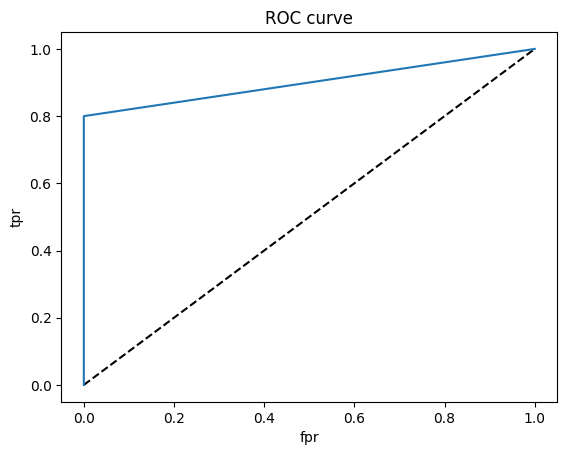

In [171]:
from sklearn.metrics import roc_curve
y_pred = xgbc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XGBoost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# **Ada Boost(Perfectly Done)**

In [172]:
from sklearn.ensemble import AdaBoostClassifier
#lrc = LogisticRegression(max_iter=1100)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_smote, y_smote)

print(classification_report(y_test,abc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.80      0.89         5

    accuracy                           0.95        22
   macro avg       0.97      0.90      0.93        22
weighted avg       0.96      0.95      0.95        22



/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [173]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(abc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgia

Results =  0.945021645021645 +/- 0.03391022688756043


/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# **KNN(Perfectly Done)**

In [174]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_smote, y_smote)

# accuracy score on the test data
knn_prediction = knn.predict(X_test) 
knn_prediction_accuracy = accuracy_score(knn_prediction, y_test) 
print('Accuracy score of Test data: ', knn_prediction_accuracy)
print(classification_report(y_test, knn_prediction)) 

Accuracy score of Test data:  0.9545454545454546
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.83      1.00      0.91         5

    accuracy                           0.95        22
   macro avg       0.92      0.97      0.94        22
weighted avg       0.96      0.95      0.96        22



In [175]:
k = range(1, 100)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x) # Euclidean Distance Metric
    knn_clf.fit(X_smote, y_smote)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_smote, knn_clf.predict(X_smote)))
    test_acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy')

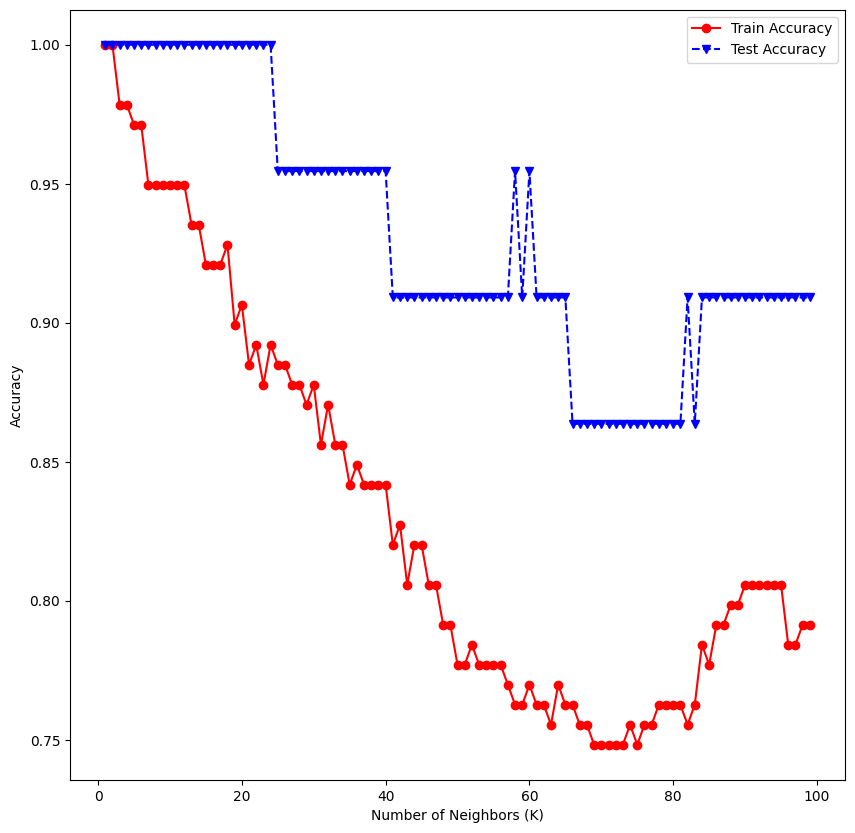

In [176]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')

In [177]:
for x in k:
    print('Number of neighbors = ', x, "Train accuracy = ", train_acc[x-1], "Test Accuracy = ", test_acc[x-1], "Difference = ",
         (abs(train_acc[x-1] - test_acc[x-1])*100), "%")

Number of neighbors =  1 Train accuracy =  1.0 Test Accuracy =  1.0 Difference =  0.0 %
Number of neighbors =  2 Train accuracy =  1.0 Test Accuracy =  1.0 Difference =  0.0 %
Number of neighbors =  3 Train accuracy =  0.9784172661870504 Test Accuracy =  1.0 Difference =  2.1582733812949617 %
Number of neighbors =  4 Train accuracy =  0.9784172661870504 Test Accuracy =  1.0 Difference =  2.1582733812949617 %
Number of neighbors =  5 Train accuracy =  0.9712230215827338 Test Accuracy =  1.0 Difference =  2.877697841726623 %
Number of neighbors =  6 Train accuracy =  0.9712230215827338 Test Accuracy =  1.0 Difference =  2.877697841726623 %
Number of neighbors =  7 Train accuracy =  0.9496402877697842 Test Accuracy =  1.0 Difference =  5.035971223021585 %
Number of neighbors =  8 Train accuracy =  0.9496402877697842 Test Accuracy =  1.0 Difference =  5.035971223021585 %
Number of neighbors =  9 Train accuracy =  0.9496402877697842 Test Accuracy =  1.0 Difference =  5.035971223021585 %
Num

In [178]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [36],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose  = 1,
    cv = 10,
    return_train_score=False,
    scoring= 'accuracy',
    n_jobs = -1
    )
    
knn_grid.fit(X_smote, y_smote)
    

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [36],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [179]:
knn_grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [180]:
knn_bestgrid=knn_grid.best_estimator_

In [181]:
knn_bestgrid

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [182]:
y_pred=knn_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[17  0]
 [ 0  5]]
Accuracy Score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         5

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [183]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(knn_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.9722943722943723 +/- 0.03658969109803541


# **Soft Voting**

In [184]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('RF',RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)))
estimator.append(('SVC', SVC(C=100, gamma=0.1,probability=True)))
estimator.append(('ABC',AdaBoostClassifier(n_estimators=50,learning_rate=1)))
estimator.append(('Bag',BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=5,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)))



# Voting Classifier with soft voting
Hyper_vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
Hyper_vot_soft.fit(X_smote, y_smote)
y_pred = Hyper_vot_soft.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Soft Voting Score  0
[[17  0]
 [ 1  4]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.80      0.89         5

    accuracy                           0.95        22
   macro avg       0.97      0.90      0.93        22
weighted avg       0.96      0.95      0.95        22



In [185]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(Hyper_vot_soft,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgia

Results =  0.9722943722943723 +/- 0.03658969109803541


## **ZeroR**


In [186]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_smote, y_smote)
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_smote, dummy_clf.predict(X_smote)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.23      1.00      0.37         5

    accuracy                           0.23        22
   macro avg       0.11      0.50      0.19        22
weighted avg       0.05      0.23      0.08        22

Train Accuracy:  0.5035971223021583
Test Accuracy:  0.22727272727272727


/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined an

In [187]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
cm_norm

array([[0., 1.],
       [0., 1.]])

## **Auc Curve**

In [188]:
DTC2=BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
DTC2.fit(X_smote, y_smote)


DTC3=DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=0)
DTC3.fit(X_smote, y_smote)

rf_randomcv2= RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
rf_randomcv2.fit(X_smote, y_smote)

SVC2=SVC(C=100, gamma=0.1,probability=True)
SVC2.fit(X_smote, y_smote)

lr_grid2= lr_bestgrid
lr_grid2.fit(X_smote, y_smote)

gs_NB2=gs_NB
gs_NB2.fit(X_smote, y_smote)

XGB_clf2=XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
XGB_clf2.fit(X_smote, y_smote)

knn_grid2= KNeighborsClassifier(n_neighbors=95,metric='manhattan', weights='distance')
knn_grid2.fit(X_smote, y_smote)


KNeighborsClassifier(metric='manhattan', n_neighbors=95, weights='distance')

In [189]:
final_roc_auc = []

In [190]:
#use the model to predict the target values for test dataset. We are storing the predicted class by all the models and we will use it to get the ROC AUC score
probas1 = dummy_clf.predict_proba(X_test)[:, 1]
probas2 = DTC2.predict_proba(X_test)[:, 1]
probas3 = knn_grid2.predict_proba(X_test)[:, 1]
probas4 = SVC2.predict_proba(X_test)[:, 1]
probas5 = rf_randomcv2.predict_proba(X_test)[:, 1]
probas6 = gs_NB2.predict_proba(X_test)[:, 1]
probas7 = abc.predict_proba(X_test)[:, 1]
probas8 = XGB_clf2.predict_proba(X_test)[:, 1]
probas9 = lr_grid2.predict_proba(X_test)[:, 1]
probas10 = Hyper_vot_soft.predict_proba(X_test)[:, 1]
probas11 = DTC3.predict_proba(X_test)[:, 1]

In [191]:
# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, probas5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)
false_positive_rate7, true_positive_rate7, threshold6 = roc_curve(y_test, probas7)
false_positive_rate8, true_positive_rate8, threshold6 = roc_curve(y_test, probas8)
false_positive_rate9, true_positive_rate9, threshold6 = roc_curve(y_test, probas9)
false_positive_rate10, true_positive_rate10, threshold6 = roc_curve(y_test, probas10)
false_positive_rate11, true_positive_rate11, threshold6 = roc_curve(y_test, probas11)

In [192]:
print('roc_auc_score for ZeroR Classifier: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Bagging DecisionTree: ', roc_auc_score(y_test, probas2))
print('roc_auc_score for KNN Classifier: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for SVM Classifier: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, probas5))
print('roc_auc_score for Naive Bays Classifier: ', roc_auc_score(y_test, probas6))
print('roc_auc_score for Ada Boost Classifier: ', roc_auc_score(y_test, probas7))
print('roc_auc_score for XG Boost Classifier: ', roc_auc_score(y_test, probas8))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, probas9))
print('roc_auc_score for Voting Classifier: ', roc_auc_score(y_test, probas10))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas11))

roc_auc_score for ZeroR Classifier:  0.5
roc_auc_score for Bagging DecisionTree:  1.0
roc_auc_score for KNN Classifier:  1.0
roc_auc_score for SVM Classifier:  0.9882352941176471
roc_auc_score for Random Forest Classifier:  1.0
roc_auc_score for Naive Bays Classifier:  0.9882352941176471
roc_auc_score for Ada Boost Classifier:  0.8235294117647058
roc_auc_score for XG Boost Classifier:  0.9882352941176471
roc_auc_score for Logistic Regression:  0.9882352941176471
roc_auc_score for Voting Classifier:  1.0
roc_auc_score for DecisionTree:  0.9


In [193]:
final_roc_auc.append({'model_name': 'ZeroR Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_auc.append({'model_name': 'Bagging Decision Tree Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_auc.append({'model_name': 'KNeighbors Classifier', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_auc.append({'model_name': 'SVM Classifier', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_auc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate5, 'tpr': true_positive_rate5, 'auc': roc_auc_score(y_test, probas5)})
final_roc_auc.append({'model_name': 'Naive Bays Classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})
final_roc_auc.append({'model_name': 'Ada Boost Classifier', 'fpr': false_positive_rate7, 'tpr': true_positive_rate7, 'auc': roc_auc_score(y_test, probas7)})
final_roc_auc.append({'model_name': 'XG Boost Classifier', 'fpr': false_positive_rate8, 'tpr': true_positive_rate8, 'auc': roc_auc_score(y_test, probas8)})
final_roc_auc.append({'model_name': 'Logistic Regression', 'fpr': false_positive_rate9, 'tpr': true_positive_rate9, 'auc': roc_auc_score(y_test, probas9)})
final_roc_auc.append({'model_name': 'Voting Classifier', 'fpr': false_positive_rate10, 'tpr': true_positive_rate10, 'auc': roc_auc_score(y_test, probas10)})
final_roc_auc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate11, 'tpr': true_positive_rate11, 'auc': roc_auc_score(y_test, probas11)})

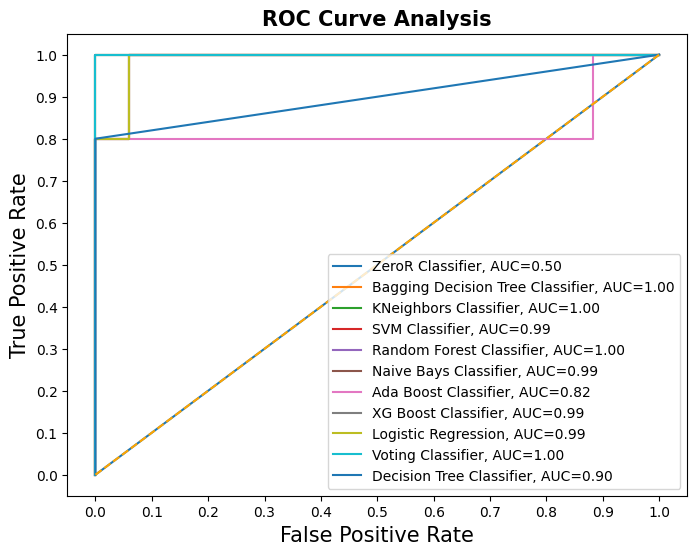

In [194]:
fig = plt.figure(figsize=(8,6))

for m in final_roc_auc:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

*********************************************************************************************************************
### Contribution  Code :
In the field of contribution, we will test the same model that are on github on a completely different dataset of diabetes that is present in sklearn library.

#### Description of the diabetes data that is to be used

The diabetes dataset available in the sklearn library, known as the "Diabetes" dataset, is commonly used in machine learning for regression analyses. This dataset is a well-known benchmark dataset and contains several quantitative variables from medical examinations of diabetes patients. The data is derived from a study involving 442 diabetes patients, and the features include age, sex, body mass index (BMI), average blood pressure, and six blood serum measurements.

The target variable is a quantitative measure of disease progression one year after baseline, which provides a basis for a regression task to predict the progression based on the available features. While using the dataset, in target variable we assume that the level greater than 150 is considered as diabetes and lower than that as no diabetes .

One of the key characteristics of this dataset is that all the feature variables and the target have been mean centered and scaled by the standard deviation times the number of samples, essentially standardizing them.

In [195]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold,cross_val_score

from sklearn.ensemble import BaggingClassifier

In [196]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.target[:3]
diabetes.data.shape

(442, 10)

In [197]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [198]:
diabetes_df['outcome'] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [199]:
# Rename the columns
diabetes_df = diabetes_df.rename(columns={
    's1': 'total serum cholesterol',
    's2': 'LDL cholesterol',
    's3': 'HDL cholesterol',
    's4': 'total cholesterol',
    's5': 'log of serum triglycerides level',
    's6': 'blood sugar level'
})

In [200]:
diabetes_df['outcome'] = (diabetes.target > 150).astype(int)
diabetes_df

,age,sex,bmi,bp,total serum cholesterol,LDL cholesterol,HDL cholesterol,total cholesterol,log of serum triglycerides level,blood sugar level,outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,1
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,1


In [201]:
diabetes_df

,age,sex,bmi,bp,total serum cholesterol,LDL cholesterol,HDL cholesterol,total cholesterol,log of serum triglycerides level,blood sugar level,outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,1
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,1


In [202]:
diabetes_df.to_csv('diabetes_data.csv', index=False)

In [203]:
import matplotlib.pyplot as plt
%matplotlib inline

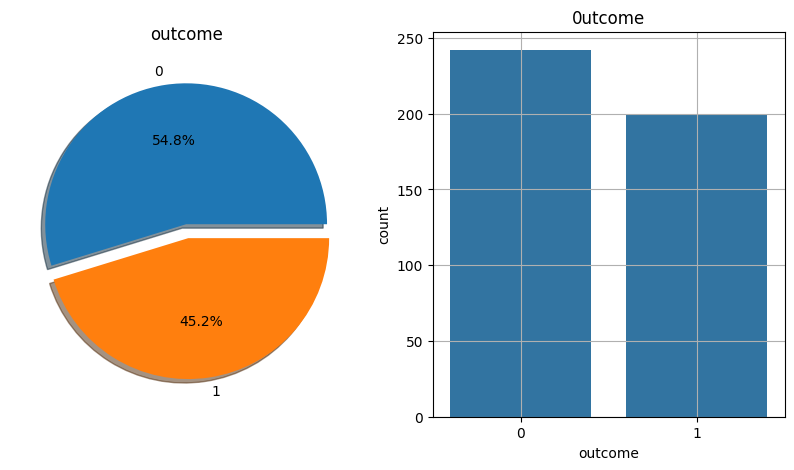

In [220]:


# outcome
f,ax = plt.subplots(1,2, figsize=(10,5))
diabetes_df['outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('outcome')
ax[0].set_ylabel('')
sns.countplot(x='outcome', data=diabetes_df, ax=ax[1])  # Removed the 'ax' parameter
ax[1].set_title('0utcome')
N,P = diabetes_df['outcome'].value_counts()


plt.grid()
plt.show()

In [205]:
diabetes_df['outcome'].value_counts()

outcome
0    242
1    200
Name: count, dtype: int64

# **Split the Data (Train Test Split)**

In [206]:
X=diabetes_df.drop(columns='outcome',axis=1)
Y=diabetes_df['outcome']

In [207]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [208]:
mutual_info = mutual_info_classif(X_train, y_train, random_state = 0)
mutual_info

array([0.0019648 , 0.        , 0.13664471, 0.08951157, 0.        ,
       0.02467125, 0.07820157, 0.07672385, 0.16233415, 0.05709121])

In [209]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

log of serum triglycerides level    0.162334
bmi                                 0.136645
bp                                  0.089512
HDL cholesterol                     0.078202
total cholesterol                   0.076724
blood sugar level                   0.057091
LDL cholesterol                     0.024671
age                                 0.001965
sex                                 0.000000
total serum cholesterol             0.000000
dtype: float64

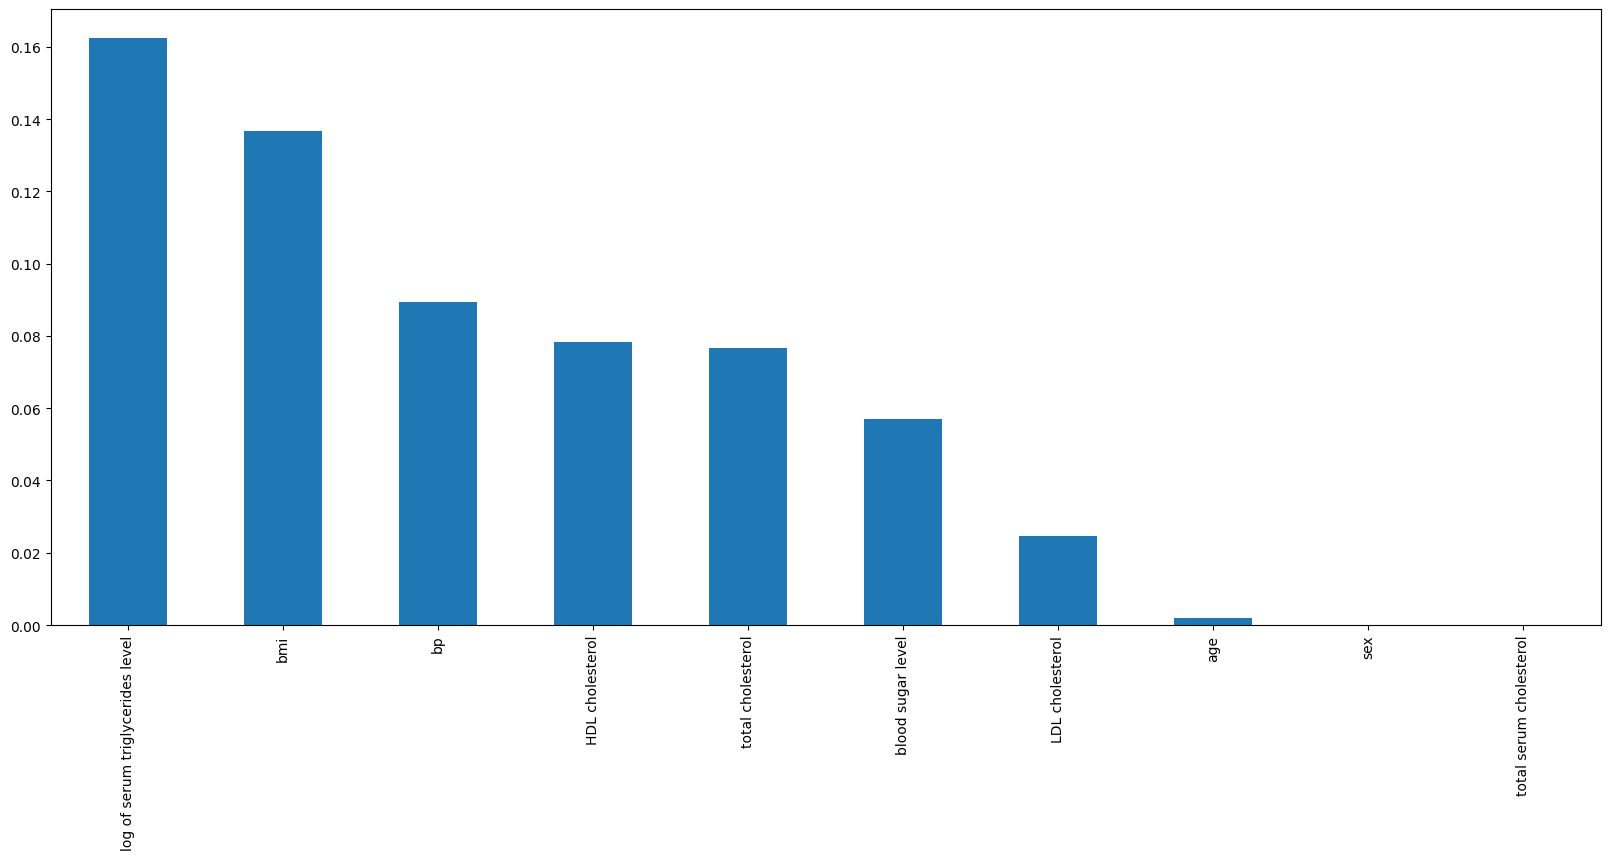

In [210]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [211]:
diabetes_df.head(10)

,age,sex,bmi,bp,total serum cholesterol,LDL cholesterol,HDL cholesterol,total cholesterol,log of serum triglycerides level,blood sugar level,outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,1


In [212]:
X = diabetes_df.drop(columns='outcome', axis=1)
Y = diabetes_df['outcome']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0, stratify =Y )

In [214]:
print(X.shape, X_train.shape,y_train.shape, X_test.shape)

(442, 10) (353, 10) (353,) (89, 10)


In [215]:
from imblearn.over_sampling import ADASYN
from collections import Counter

counter  = Counter(y_train)
print('Before',counter)
ada = ADASYN(random_state=0,sampling_strategy='minority')

X_smote, y_smote = ada.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print('After',counter)

Before Counter({0: 193, 1: 160})
After Counter({0: 193, 1: 172})


In [216]:

# Befor smote
y_train.value_counts()

outcome
0    193
1    160
Name: count, dtype: int64

In [217]:

# after smote

y_smote.value_counts()

outcome
0    193
1    172
Name: count, dtype: int64

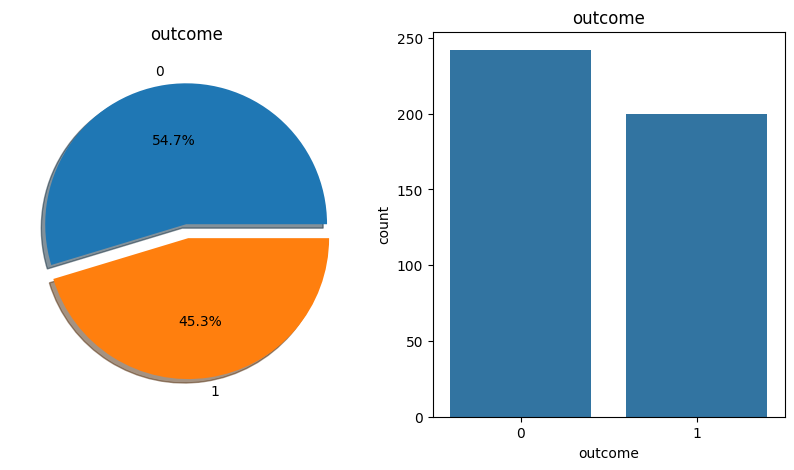

In [221]:
# outcome before smote
f,ax = plt.subplots(1,2, figsize=(10,5))
y_train.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('outcome')
ax[0].set_ylabel('')
sns.countplot(x='outcome', data=diabetes_df, ax=ax[1])  # Removed the 'ax' parameter
ax[1].set_title('outcome')
N,P = diabetes_df['outcome'].value_counts()


plt.show()

# ADSYN IMPlementaion

In [222]:
from imblearn.over_sampling import ADASYN
from collections import Counter

counter  = Counter(y_train)
print('Before',counter)
ada = ADASYN(random_state=0,sampling_strategy='minority')

X_smote, y_smote = ada.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print('After',counter)

Before Counter({0: 193, 1: 160})
After Counter({0: 193, 1: 172})


In [223]:

# Befor smote
y_train.value_counts()

outcome
0    193
1    160
Name: count, dtype: int64

In [224]:

# after smote

y_smote.value_counts()

outcome
0    193
1    172
Name: count, dtype: int64

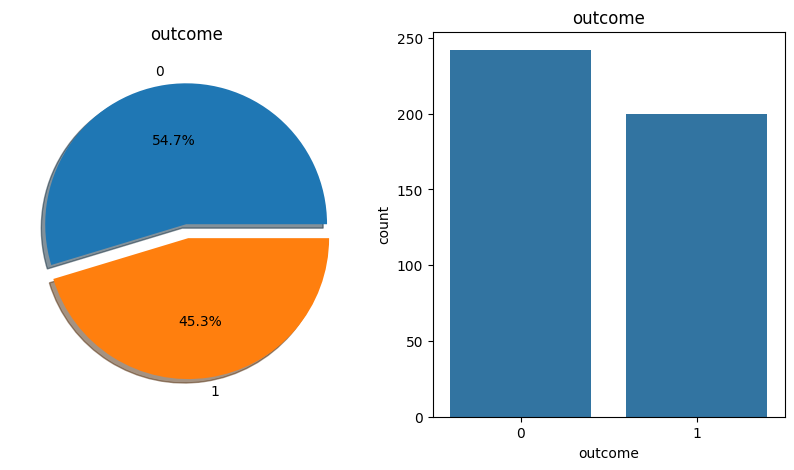

In [226]:
# outcome before smote
f,ax = plt.subplots(1,2, figsize=(10,5))
y_train.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('outcome')
ax[0].set_ylabel('')
sns.countplot(x='outcome', data=diabetes_df, ax=ax[1])  # Removed the 'ax' parameter
ax[1].set_title('outcome')
N,P = diabetes_df['outcome'].value_counts()


plt.show()

# After smote

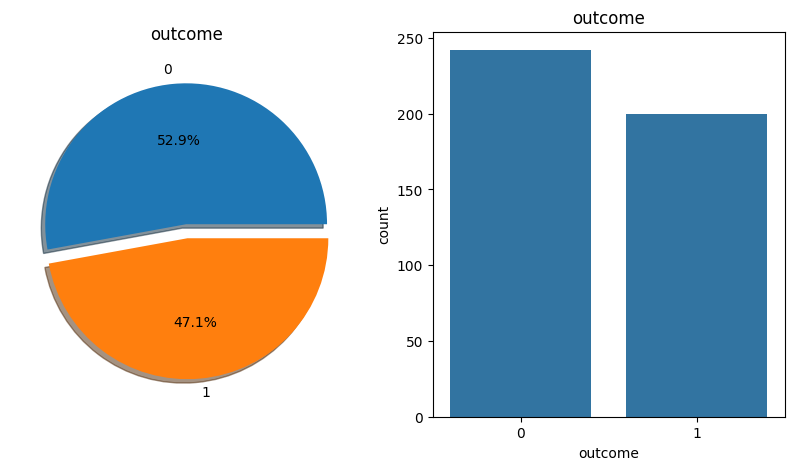

In [227]:
# outcome
f,ax = plt.subplots(1,2, figsize=(10,5))
y_smote.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('outcome')
ax[0].set_ylabel('')
sns.countplot(x='outcome', data=diabetes_df, ax=ax[1])  # Removed the 'ax' parameter
ax[1].set_title('outcome')
N,P = diabetes_df['outcome'].value_counts()



plt.show()

In [228]:

# Befor smote
y_train.value_counts()

outcome
0    193
1    160
Name: count, dtype: int64

In [229]:
# after smote

y_smote.value_counts()

outcome
0    193
1    172
Name: count, dtype: int64

#  **Grid search on svm (PERFECTLY DONE)**



In [230]:
from sklearn.svm import SVC

In [232]:
svm_clf = svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
# fitting the model for grid search
svm_grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.534 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [233]:
svm_grid.best_estimator_
svm_bestgrid=svm_grid.best_estimator_
svm_bestgrid

SVC(C=1, gamma=1)

In [234]:
y_pred=svm_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[42  7]
 [15 25]]
Accuracy Score 0.7528089887640449
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        49
           1       0.78      0.62      0.69        40

    accuracy                           0.75        89
   macro avg       0.76      0.74      0.74        89
weighted avg       0.76      0.75      0.75        89



**K-fold cross validation(SVM)**

In [235]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(svm_grid,X,Y,cv=skfold)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.549 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [236]:
cv_score

array([0.71910112, 0.79775281, 0.65909091, 0.70454545, 0.78409091])

In [237]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7329162410623085 +/- 0.05151420353109062


# **Bagging Decision tree(PERFECTLY DONE)**


In [238]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=5,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
bagging.fit(X_smote,y_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=5, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [239]:
y_pred=bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[42  7]
 [18 22]]
Accuracy Score 0.7191011235955056
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        49
           1       0.76      0.55      0.64        40

    accuracy                           0.72        89
   macro avg       0.73      0.70      0.70        89
weighted avg       0.73      0.72      0.71        89



**K-fold cross validation (Bagging)**

In [240]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(bagging,X,Y,cv=skfold)

In [241]:
cv_score

array([0.69662921, 0.78651685, 0.69318182, 0.76136364, 0.73863636])

In [242]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7352655771195098 +/- 0.036284915969007264


# **Bagging Decision tree(PERFECTLY DONE)**


In [243]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=5,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
bagging.fit(X_smote,y_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=5, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [244]:
y_pred=bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[42  7]
 [18 22]]
Accuracy Score 0.7191011235955056
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        49
           1       0.76      0.55      0.64        40

    accuracy                           0.72        89
   macro avg       0.73      0.70      0.70        89
weighted avg       0.73      0.72      0.71        89



**K-fold cross validation (Bagging)**

In [245]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(bagging,X,Y,cv=skfold)

In [246]:
cv_score

array([0.69662921, 0.78651685, 0.69318182, 0.76136364, 0.73863636])

In [247]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7352655771195098 +/- 0.036284915969007264


# **Decision Tree(Perfectly Done)**

Depth =  2 , Training Accuracy =  0.7561643835616438 , Test Accuracy =  0.651685393258427 , Diff =  10.447899030321683  %
Depth =  3 , Training Accuracy =  0.7808219178082192 , Test Accuracy =  0.6966292134831461 , Diff =  8.419270432507309  %
Depth =  4 , Training Accuracy =  0.8191780821917808 , Test Accuracy =  0.6966292134831461 , Diff =  12.25488687086347  %
Depth =  5 , Training Accuracy =  0.8547945205479452 , Test Accuracy =  0.651685393258427 , Diff =  20.310912728951823  %
Depth =  6 , Training Accuracy =  0.9013698630136986 , Test Accuracy =  0.651685393258427 , Diff =  24.968446975527158  %
Depth =  7 , Training Accuracy =  0.936986301369863 , Test Accuracy =  0.6629213483146067 , Diff =  27.406495305525635  %
Depth =  8 , Training Accuracy =  0.958904109589041 , Test Accuracy =  0.6292134831460674 , Diff =  32.96906264429737  %
Depth =  9 , Training Accuracy =  0.9863013698630136 , Test Accuracy =  0.6741573033707865 , Diff =  31.214406649222713  %
Depth =  10 , Training A

Text(0, 0.5, 'Accuracy')

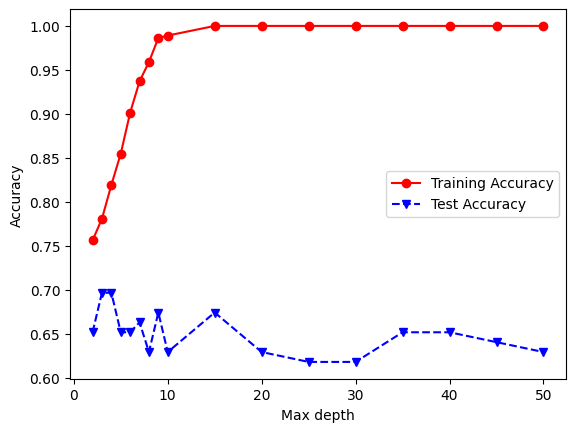

In [248]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_smote, y_smote)
    y_predTrain = clf.predict(X_smote)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_smote, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [249]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 2, random_state=0)
dt.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [250]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_smote, y_smote))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))
X_test_prediction  = dt.predict(X_test) 

print(classification_report(y_test, X_test_prediction))

Training Accuracy is:  0.7561643835616438
Testing Accuracy is:  0.651685393258427
              precision    recall  f1-score   support

           0       0.65      0.80      0.72        49
           1       0.66      0.47      0.55        40

    accuracy                           0.65        89
   macro avg       0.65      0.64      0.63        89
weighted avg       0.65      0.65      0.64        89



In [251]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(dt,X,Y,cv=skfold)


In [252]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7035750766087845 +/- 0.03277781844623685


# **Logistic** **Regression(Perfectly Done)**

In [253]:
lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV

grid_params = { 'max_iter' : [10000],
               'warm_start' : [False,True],
               'penalty' : ['l1', 'l2', 'elasticnet']
               
               }

lr_grid = GridSearchCV(
    LogisticRegression(),
    grid_params,
    verbose  = 1,
    scoring='accuracy',
    cv = 3,
    n_jobs = -1
    )
    
lr_grid.fit(X_smote, y_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
12 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wra

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'warm_start': [False, True]},
             scoring='accuracy', verbose=1)

In [254]:
lr_bestgrid=lr_grid.best_estimator_

In [255]:
y_pred=lr_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[41  8]
 [17 23]]
Accuracy Score 0.7191011235955056
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        49
           1       0.74      0.57      0.65        40

    accuracy                           0.72        89
   macro avg       0.72      0.71      0.71        89
weighted avg       0.72      0.72      0.71        89



In [256]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(lr_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7353166496424924 +/- 0.051584196332268996


# **Gausien Naive Bays(Perfectly Done)**

In [257]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_smote, y_smote)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [258]:
gs_NB.best_params_

{'var_smoothing': 0.15199110829529336}

In [259]:
gs_NB=gs_NB.best_estimator_


In [260]:
y_pred=gs_NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[40  9]
 [15 25]]
Accuracy Score 0.7303370786516854
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        49
           1       0.74      0.62      0.68        40

    accuracy                           0.73        89
   macro avg       0.73      0.72      0.72        89
weighted avg       0.73      0.73      0.73        89



In [261]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(GaussianNB(),X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7263023493360572 +/- 0.06201146578056308



# **Random Forest(Perfectly Done)**

In [262]:
###The hyperparameter we got from grid search
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
### fit the randomized model
rf.fit(X_smote, y_smote)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

In [263]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[43  6]
 [22 18]]
Accuracy Score 0.6853932584269663
              precision    recall  f1-score   support

           0       0.66      0.88      0.75        49
           1       0.75      0.45      0.56        40

    accuracy                           0.69        89
   macro avg       0.71      0.66      0.66        89
weighted avg       0.70      0.69      0.67        89



In [264]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(rf,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7328651685393259 +/- 0.045230940523465844


# **XG Boost(Perfectly Done)**

In [265]:
###The hyperparameter we got from grid search
from xgboost import XGBClassifier
xgbc = XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_smote, y_smote)

In [266]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[44  5]
 [20 20]]
Accuracy Score 0.7191011235955056
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        49
           1       0.80      0.50      0.62        40

    accuracy                           0.72        89
   macro avg       0.74      0.70      0.70        89
weighted avg       0.74      0.72      0.71        89



In [267]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(xgbc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7125638406537284 +/- 0.047233759584659744


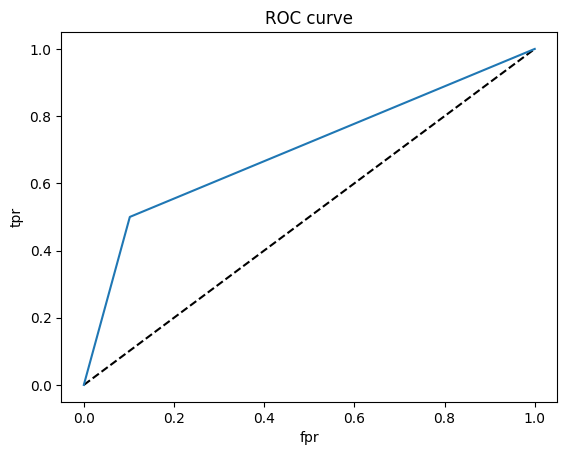

In [268]:
from sklearn.metrics import roc_curve
y_pred = xgbc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XGBoost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# **Ada Boost(Perfectly Done)**

In [269]:
from sklearn.ensemble import AdaBoostClassifier
#lrc = LogisticRegression(max_iter=1100)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_smote, y_smote)

print(classification_report(y_test,abc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.86      0.76        49
           1       0.75      0.53      0.62        40

    accuracy                           0.71        89
   macro avg       0.72      0.69      0.69        89
weighted avg       0.72      0.71      0.70        89



/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [270]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(abc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Results =  0.7126149131767109 +/- 0.039277592675902154


/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# KNN

In [271]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_smote, y_smote)

# accuracy score on the test data
knn_prediction = knn.predict(X_test) 
knn_prediction_accuracy = accuracy_score(knn_prediction, y_test) 
print('Accuracy score of Test data: ', knn_prediction_accuracy)
print(classification_report(y_test, knn_prediction)) 

Accuracy score of Test data:  0.7191011235955056
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        49
           1       0.76      0.55      0.64        40

    accuracy                           0.72        89
   macro avg       0.73      0.70      0.70        89
weighted avg       0.73      0.72      0.71        89



In [272]:
k = range(1, 100)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x) # Euclidean Distance Metric
    knn_clf.fit(X_smote, y_smote)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_smote, knn_clf.predict(X_smote)))
    test_acc.append(accuracy_score(y_test, y_pred))

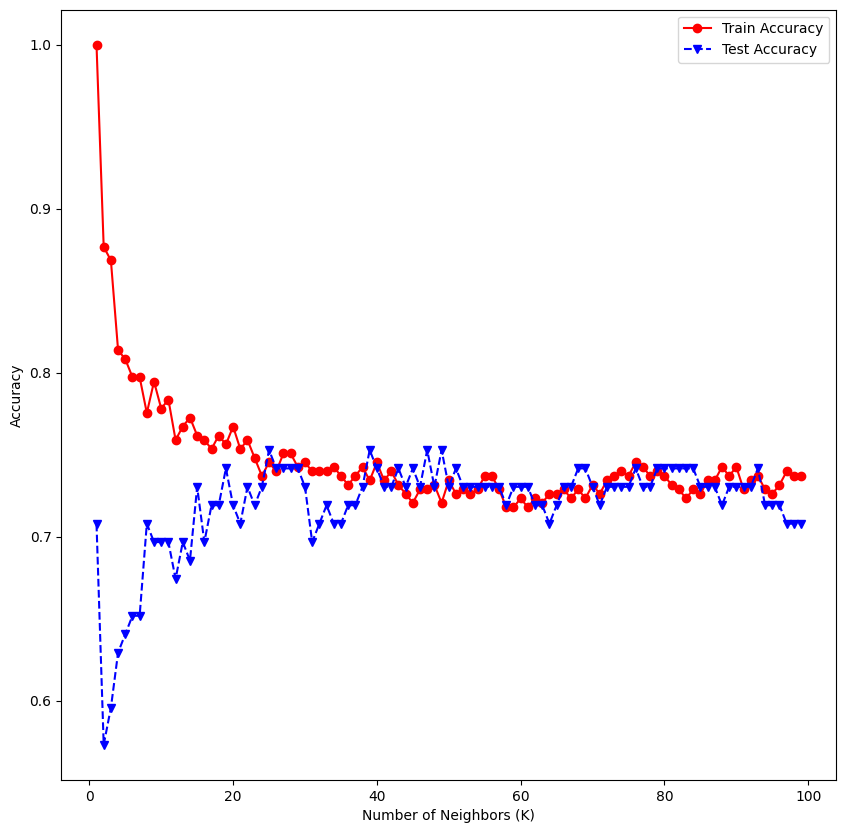

In [273]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [274]:
for x in k:
    print('Number of neighbors = ', x, "Train accuracy = ", train_acc[x-1], "Test Accuracy = ", test_acc[x-1], "Difference = ",
         (abs(train_acc[x-1] - test_acc[x-1])*100), "%")

Number of neighbors =  1 Train accuracy =  1.0 Test Accuracy =  0.7078651685393258 Difference =  29.21348314606742 %
Number of neighbors =  2 Train accuracy =  0.8767123287671232 Test Accuracy =  0.5730337078651685 Difference =  30.367862090195473 %
Number of neighbors =  3 Train accuracy =  0.8684931506849315 Test Accuracy =  0.5955056179775281 Difference =  27.298753270740338 %
Number of neighbors =  4 Train accuracy =  0.8136986301369863 Test Accuracy =  0.6292134831460674 Difference =  18.448514699091888 %
Number of neighbors =  5 Train accuracy =  0.8082191780821918 Test Accuracy =  0.6404494382022472 Difference =  16.77697398799446 %
Number of neighbors =  6 Train accuracy =  0.7972602739726027 Test Accuracy =  0.651685393258427 Difference =  14.557488071417568 %
Number of neighbors =  7 Train accuracy =  0.7972602739726027 Test Accuracy =  0.651685393258427 Difference =  14.557488071417568 %
Number of neighbors =  8 Train accuracy =  0.7753424657534247 Test Accuracy =  0.7078651

In [275]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [36],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose  = 1,
    cv = 10,
    return_train_score=False,
    scoring= 'accuracy',
    n_jobs = -1
    )
    
knn_grid.fit(X_smote, y_smote)
    

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [36],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [276]:
knn_grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [277]:
knn_bestgrid=knn_grid.best_estimator_

In [278]:
knn_bestgrid

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [279]:
y_pred=knn_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[42  7]
 [17 23]]
Accuracy Score 0.7303370786516854
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        49
           1       0.77      0.57      0.66        40

    accuracy                           0.73        89
   macro avg       0.74      0.72      0.72        89
weighted avg       0.74      0.73      0.72        89



In [280]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(knn_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7601889683350358 +/- 0.041668528155076566


# Soft Voting

In [281]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('RF',RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)))
estimator.append(('SVC', SVC(C=100, gamma=0.1,probability=True)))
estimator.append(('ABC',AdaBoostClassifier(n_estimators=50,learning_rate=1)))
estimator.append(('Bag',BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=5,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)))



# Voting Classifier with soft voting
Hyper_vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
Hyper_vot_soft.fit(X_smote, y_smote)
y_pred = Hyper_vot_soft.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Soft Voting Score  0
[[41  8]
 [19 21]]
              precision    recall  f1-score   support

           0       0.68      0.84      0.75        49
           1       0.72      0.53      0.61        40

    accuracy                           0.70        89
   macro avg       0.70      0.68      0.68        89
weighted avg       0.70      0.70      0.69        89



In [282]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(Hyper_vot_soft,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgia

Results =  0.7464759959141982 +/- 0.04987086076383136


# ZeroR

In [283]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_smote, y_smote)
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_smote, dummy_clf.predict(X_smote)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        49
           1       0.00      0.00      0.00        40

    accuracy                           0.55        89
   macro avg       0.28      0.50      0.36        89
weighted avg       0.30      0.55      0.39        89

Train Accuracy:  0.5287671232876713
Test Accuracy:  0.550561797752809


/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined an

In [284]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

Auc Curve

In [285]:
DTC2=BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
DTC2.fit(X_smote, y_smote)


DTC3=DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=0)
DTC3.fit(X_smote, y_smote)

rf_randomcv2= RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
rf_randomcv2.fit(X_smote, y_smote)

SVC2=SVC(C=100, gamma=0.1,probability=True)
SVC2.fit(X_smote, y_smote)

lr_grid2= lr_bestgrid
lr_grid2.fit(X_smote, y_smote)

gs_NB2=gs_NB
gs_NB2.fit(X_smote, y_smote)

XGB_clf2=XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
XGB_clf2.fit(X_smote, y_smote)

knn_grid2= KNeighborsClassifier(n_neighbors=95,metric='manhattan', weights='distance')
knn_grid2.fit(X_smote, y_smote)


KNeighborsClassifier(metric='manhattan', n_neighbors=95, weights='distance')

In [288]:
final_roc_aucc = []

In [289]:
#use the model to predict the target values for test dataset. We are storing the predicted class by all the models and we will use it to get the ROC AUC score
probas1 = dummy_clf.predict_proba(X_test)[:, 1]
probas2 = DTC2.predict_proba(X_test)[:, 1]
probas3 = knn_grid2.predict_proba(X_test)[:, 1]
probas4 = SVC2.predict_proba(X_test)[:, 1]
probas5 = rf_randomcv2.predict_proba(X_test)[:, 1]
probas6 = gs_NB2.predict_proba(X_test)[:, 1]
probas7 = abc.predict_proba(X_test)[:, 1]
probas8 = XGB_clf2.predict_proba(X_test)[:, 1]
probas9 = lr_grid2.predict_proba(X_test)[:, 1]
probas10 = Hyper_vot_soft.predict_proba(X_test)[:, 1]
probas11 = DTC3.predict_proba(X_test)[:, 1]

In [290]:
# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, probas5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)
false_positive_rate7, true_positive_rate7, threshold6 = roc_curve(y_test, probas7)
false_positive_rate8, true_positive_rate8, threshold6 = roc_curve(y_test, probas8)
false_positive_rate9, true_positive_rate9, threshold6 = roc_curve(y_test, probas9)
false_positive_rate10, true_positive_rate10, threshold6 = roc_curve(y_test, probas10)
false_positive_rate11, true_positive_rate11, threshold6 = roc_curve(y_test, probas11)

In [291]:
print('roc_auc_score for ZeroR Classifier: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Bagging DecisionTree: ', roc_auc_score(y_test, probas2))
print('roc_auc_score for KNN Classifier: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for SVM Classifier: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, probas5))
print('roc_auc_score for Naive Bays Classifier: ', roc_auc_score(y_test, probas6))
print('roc_auc_score for Ada Boost Classifier: ', roc_auc_score(y_test, probas7))
print('roc_auc_score for XG Boost Classifier: ', roc_auc_score(y_test, probas8))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, probas9))
print('roc_auc_score for Voting Classifier: ', roc_auc_score(y_test, probas10))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas11))

roc_auc_score for ZeroR Classifier:  0.5
roc_auc_score for Bagging DecisionTree:  0.7553571428571428
roc_auc_score for KNN Classifier:  0.8224489795918367
roc_auc_score for SVM Classifier:  0.8209183673469388
roc_auc_score for Random Forest Classifier:  0.7665816326530612
roc_auc_score for Naive Bays Classifier:  0.8035714285714286
roc_auc_score for Ada Boost Classifier:  0.7867346938775509
roc_auc_score for XG Boost Classifier:  0.7607142857142857
roc_auc_score for Logistic Regression:  0.8066326530612244
roc_auc_score for Voting Classifier:  0.8204081632653061
roc_auc_score for DecisionTree:  0.7239795918367347


In [292]:
final_roc_aucc.append({'model_name': 'ZeroR Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_aucc.append({'model_name': 'Bagging Decision Tree Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_aucc.append({'model_name': 'KNeighbors Classifier', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_aucc.append({'model_name': 'SVM Classifier', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_aucc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate5, 'tpr': true_positive_rate5, 'auc': roc_auc_score(y_test, probas5)})
final_roc_aucc.append({'model_name': 'Naive Bays Classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})
final_roc_aucc.append({'model_name': 'Ada Boost Classifier', 'fpr': false_positive_rate7, 'tpr': true_positive_rate7, 'auc': roc_auc_score(y_test, probas7)})
final_roc_aucc.append({'model_name': 'XG Boost Classifier', 'fpr': false_positive_rate8, 'tpr': true_positive_rate8, 'auc': roc_auc_score(y_test, probas8)})
final_roc_aucc.append({'model_name': 'Logistic Regression', 'fpr': false_positive_rate9, 'tpr': true_positive_rate9, 'auc': roc_auc_score(y_test, probas9)})
final_roc_aucc.append({'model_name': 'Voting Classifier', 'fpr': false_positive_rate10, 'tpr': true_positive_rate10, 'auc': roc_auc_score(y_test, probas10)})
final_roc_aucc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate11, 'tpr': true_positive_rate11, 'auc': roc_auc_score(y_test, probas11)})

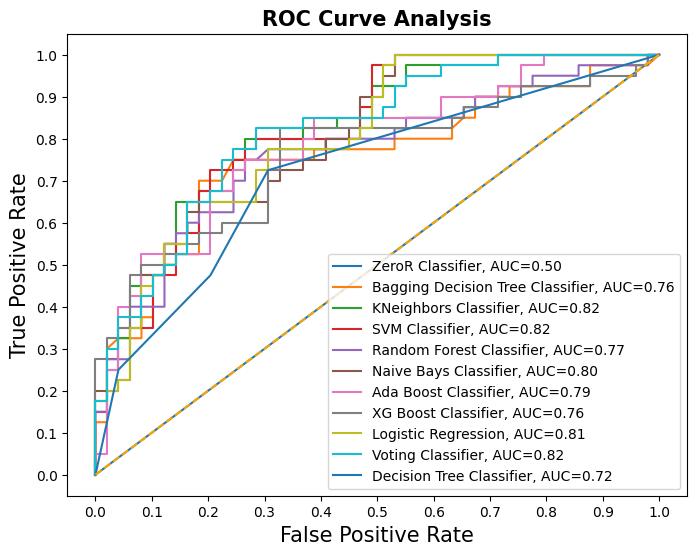

In [293]:
fig = plt.figure(figsize=(8,6))

for m in final_roc_aucc:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

### Results :
In the pima dataset, the Bagging Decision Tree Classifier, KNeighbor, Random Forest Classifier, SVM classifier, Naive Bayes Classifier, XGBoost Classifier, Logistic Regression and Voting Classifier obtained the accuracy of 0.99 to 0.1 . But the ADA boost classifier obtained the accuracy of 0.8 which is also better. However the ZeroR classifier only has an accuracy of 0.5 which is not a good model. 

when running the same model on different dataset, we obtaine different acccuracy of the model . The ZeroR Classifier got the same accuracy on both Pima and our dataset . The maximum accuracy was obtained on KNeighbors classifier, SVM classifer,Naive Bayes Classifier and LOgistic Regression which is from 0.8 to 0.82. Besides that the remaining model have an accuracy between 0.72 to 0.76.


#### Observations :
In the pima dataset, as told in the research paper , all the model has done well. However in our dataset, that we get from sklearn library , the result was not as written in the research paper. From the observation, we can see that the SVM classifier, Kneighbor classifer are better for the data set in which we have done the experiment. However as told in the research paper  and in our cases, Zero R classifier showed the worst result among all. Beside that all other models work better on the diabetes dataset 


### Conclusion and Future Direction :

The study utilizing various classifiers on the Pima dataset has demonstrated a broad spectrum of results, showcasing the potential of machine learning in predicting diabetes. High-performing models like the KNeighbor and SVM classifier reached accuracy levels close to 0.99, illustrating the power of advanced analytics in medical diagnostics. However, the performance disparity when models were applied to a different dataset highlights the critical challenge of generalization in machine learning applications.

The ADA Boost classifier, while not achieving the highest accuracy, showed commendable consistency across different datasets, suggesting its potential as a robust model for clinical applications. Conversely, the ZeroR classifier's baseline performance emphasized the necessity of more sophisticated methods in achieving accurate predictions.

The study's findings are a testament to the complexity of machine learning applications in healthcare, where data characteristics and model selection play pivotal roles in the success of predictive analytics.

#### Learnings :

From the code, of paper and experimented one , we find out that the model works differently on different dataset. In one dataset, the model performs very best, while on the other dataset, the same model with same parameter may not work  better. So there are multiple algorithms on Machine Learning, and every algorithms have their own significance. So , we should work with evey model and observe the results to find out which model works better among all and through that we can deploy the best model for the real world dataset.


#### Results Discussion :

The evaluation of various classifiers on the Pima dataset demonstrated a range of performances, revealing significant insights into the effectiveness and adaptability of these models across different datasets. Below is an analysis of the results and their implications for future research and practical application:

1. High Accuracy Models:

Several models, including the Bagging Decision Tree Classifier, KNeighbor, Random Forest Classifier, SVM classifier, Naive Bayes Classifier, XGBoost Classifier, Logistic Regression, and Voting Classifier, exhibited extremely high accuracies, reaching up to 0.99 on the Pima dataset. This high level of accuracy suggests that these models are very effective at capturing the patterns specific to this dataset, potentially due to well-tuned parameters, effective feature selection, or the inherent characteristics of the dataset that align well with these models.

2. Consistent Performer:

The ADA Boost classifier displayed a consistent accuracy of 0.8. Its performance, while not reaching the highs of other models, suggests it possesses a degree of robustness, maintaining good performance without the peaks and troughs exhibited by other models, indicating its stability across different dataset characteristics.

3. Underperforming Model:

The ZeroR classifier, which predicts the majority class without considering any input features, achieved only a 0.5 accuracy. This performance is indicative of its baseline nature, serving primarily to underscore the added value of more sophisticated classifiers.

4. Cross-Dataset Performance:

When the same models were applied to a different dataset, most exhibited a decrease in performance, with the highest accuracies (0.8 to 0.82) observed in the KNeighbors Classifier, SVM Classifier, Naive Bayes Classifier, and Logistic Regression. This decrease highlights the challenges related to model generalization in machine learning, where models optimized for one dataset may not necessarily perform as well on another due to differences in feature distributions, class imbalances, or underlying data patterns.

5. Adaptability and Generalization:

The observed variability in model performance between the two datasets underscores the need for models that can adapt and generalize well across different data characteristics. This is particularly crucial in clinical settings where models must perform consistently across diverse patient demographics and conditions.

6. Implications for Clinical Application:

The variability in performance across datasets highlights the importance of thorough validation in diverse settings prior to clinical deployment. Ensuring that models are not only statistically robust but also clinically relevant and capable of generalization is critical for their successful integration into healthcare practice.

7. Recommendations for Future Research:

Future efforts should focus on improving the robustness and adaptability of the models. This may involve exploring advanced ensemble techniques, extensive hyperparameter tuning, and the inclusion of more diverse and comprehensive datasets during the training phases. Further, enhancing feature engineering and selection processes could significantly improve model performance across varying datasets.


#### Limitations :

Addressing the limitations of a project is crucial for understanding its scope, potential improvements, and the context in which the findings should be interpreted. Here are some potential limitations we  might consider discussing based on the context of our machine learning project on diabetes prediction:

1. Dataset Size and Diversity

->Size: The relatively small size of the dataset (109 entries) can significantly limit the generalizability of the models. Small datasets might not adequately represent the underlying population diversity, leading to models that perform well on the dataset but poorly in real-world scenarios.

->Diversity: If the dataset primarily includes subjects from a specific demographic (e.g., age group, ethnicity), the model's predictions might not be applicable to other groups. This can affect the deployment of the model in diverse clinical settings.

2. Feature Limitations

->Missing Features: Important predictors of diabetes, such as lifestyle factors (diet, physical activity), family history, and detailed biochemical parameters, might be missing from the dataset. The absence of these features can lead to incomplete understanding and prediction capabilities.

->Measurement Errors: Errors in data collection, such as incorrect measurements or inconsistent measurement tools across data points, can introduce bias and affect the accuracy of the model.

3. Model Complexity and Overfitting

->Overfitting: There's a risk that the model might overfit to the training dataset, especially with complex models like deep learning, given the limited data size. Overfitting results in high accuracy on training data but poor generalization to new, unseen data.

->Interpretability: Complex models can also be difficult to interpret, which is a significant drawback in medical applications where understanding the decision-making process is crucial for trust and ethical reasons.

4. Validation and Testing

->Independent Validation: The lack of external validation with independent datasets can be a limitation. Without testing the model on separate data, it's difficult to ensure its efficacy and robustness in different settings.

->Clinical Validation: Most machine learning models require clinical validation to ensure their predictions are medically relevant and can be integrated into clinical workflows effectively. This step is often lacking in preliminary studies.

5. Ethical and Privacy Concerns

->Bias in AI: Models trained on datasets that are not diverse can inherit or even amplify biases present in the training data. This can lead to unfair or unethical outcomes when the models are used in practice.

->Data Privacy: Handling medical data requires stringent privacy protections. If the dataset includes sensitive personal information, ensuring compliance with data protection regulations (like GDPR or HIPAA) is essential and challenging.

6. Technological Integration

Real-World Integration: Integrating predictive models into existing healthcare IT systems can be challenging due to compatibility and interoperability issues. These technical challenges can limit the practical deployment of machine learning models.


#### Future Extension :

Based on the research paper and our finding , here are some proposed future extensions that can enhance the project and address potential gaps: 

1. Incorporation of Additional Datasets

->Enhanced Diversity in Data: To improve the robustness and applicability of the predictive models, incorporating datasets from varied demographics and geographic locations can be beneficial. This will help in developing a model that performs well across different population groups.

->Longitudinal Data: Adding datasets that track patients over time could provide insights into the progression of diabetes, allowing for the development of predictive models that not only diagnose but also predict future health outcomes.

2. Advanced Machine Learning Techniques

->Deep Learning: Employing deep learning models could uncover complex patterns in the data that simpler models might miss. Techniques like neural networks or deep belief networks might yield better predictive accuracy, especially with larger datasets.
Feature Engineering: More sophisticated feature engineering techniques could be explored to enhance model performance. This includes interaction terms, polynomial features, and domain-specific transformations.

->Ensemble Methods: Further exploration of ensemble methods that combine multiple machine learning techniques could improve prediction accuracy and model stability.

3. Model Explainability and Interpretation

->Explainable AI: Given the critical nature of medical predictions, increasing the transparency of the models using explainable AI techniques would be invaluable. Techniques such as SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) could help in understanding model decisions.

->Uncertainty Quantification: Implementing methods to quantify uncertainty in predictions could provide valuable insights into the confidence level of the models’ outputs, which is crucial for clinical decision-making.

4. Real-time Data Integration

->IoT and Real-Time Monitoring: Integrating the model with IoT devices for real-time monitoring and prediction could facilitate proactive management of diabetes. This could include real-time adjustments to treatment plans based on continuous data streams.

5. Clinical Trials and Validation

->Prospective Studies: Conducting prospective studies to validate the models in real-world clinical settings would be crucial to ensure their efficacy and safety before widespread deployment.

->Feedback System: Developing a system that incorporates feedback from healthcare professionals and patients to continuously improve the model based on real-world use and outcomes.

6. Interdisciplinary Collaboration

->Collaboration with Healthcare Professionals: Working closely with endocrinologists, dietitians, and other healthcare professionals to refine the models and ensure they meet clinical needs.

->Ethical Considerations: Addressing ethical considerations, especially related to patient data privacy, bias in AI models, and the impact of automated decision-making in healthcare.
These future directions aim to broaden the scope of the project, enhance its scientific rigour, and ensure its practical relevance and effectiveness in clinical settings.


# References:

[1]: Tasin, I., Nabil, T.U., Islam, S., Khan, R.: Diabetes prediction using machine learning and explainable AI techniques. Healthc. Technol. Lett. 10, 1–10 (2023). https://doi.org/10.1049/htl2.12039 

[2]: T. N. (n.d.). GitHub - tansin-nabil/Diabetes-Prediction-Using-Machine-Learning: Check the full research paper: https://ietresearch.onlinelibrary.wiley.com/doi/10.1049/htl2.12039. GitHub. https://github.com/tansin-nabil/Diabetes-Prediction-Using-Machine-Learning 
